### 0. System Setup - Set model to run on GPU (skip this to run on CPU)

In [2]:
# This needs to have output: device_type='GPU'
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

# Notes: This should work with CMD commands:
# conda create -n runOnGPU_env python=3.8 jupyterlab numpy pandas scikit-learn cudatoolkit=11.0 cudnn=8.0.5 -c conda-forge
# conda activate runOnGPU_env

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# check the working conda enviroment:
!conda info --envs

# conda environments:
#
                         C:\Users\deeman\Desktop\CNN_arhive\envs
base                     C:\Users\deeman\anaconda3
RL                       C:\Users\deeman\anaconda3\envs\RL
cnnNet                   C:\Users\deeman\anaconda3\envs\cnnNet
gpuweek1              *  C:\Users\deeman\anaconda3\envs\gpuweek1
my_rl_env                C:\Users\deeman\anaconda3\envs\my_rl_env
temp                     C:\Users\deeman\anaconda3\envs\temp
temp2                    C:\Users\deeman\anaconda3\envs\temp2
temp3                    C:\Users\deeman\anaconda3\envs\temp3
week1                    C:\Users\deeman\anaconda3\envs\week1
xray                     C:\Users\deeman\anaconda3\envs\xray



### 1. Inception - Preparing the Working Enviroment

In [4]:
# import libs
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

sns.set_theme(style='darkgrid')

In [5]:
# Verify the working Directory - Get current working directory
current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

Current Working Directory: C:\Users\deeman\Desktop\AI_2023\Section 2


### 2. Importing the Dataset, Checks and Optimizations

In [6]:
# Importing dataset & handle errors
try:
    # Importing dataset
    diabts = pd.read_csv("Diabetes_models\\data\\diabetes_012_health_indicators_BRFSS2015.csv")
except FileNotFoundError:
    print("The specified file was not found.")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("Error during parsing the file.")
except Exception as e:
    print(f"An error occurred: {e}")
# Show a part of the dataset
diabts.head().T

,0,1,2,3,4
Diabetes_012,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0
HighChol,1.0,0.0,1.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0
Smoker,1.0,1.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0


In [7]:
# Check storage memory usage for optimization:
# print(diabts.memory_usage(deep=True)) # << uncomment this to see SSD usage

# Check the shape of the DB
diabts.shape

(253680, 22)

In [8]:
# Check statistical properties 
diabts.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


### 3. Dataset Cleaning & Optimization

In [9]:
# Convert Diabetes class values from float to integers
diabts['Diabetes_012'] = pd.to_numeric(diabts['Diabetes_012'], downcast='integer', errors='coerce')

diabts.head().T
# Note: 
# Pandas uses Transpose function to align the whole dataset type, 
# for this reason Diabetes_012 columns will continue to be seen as float, 
# even if it is now integer type. Check with next line:
# print(diabts['Diabetes_012'].dtype)

,0,1,2,3,4
Diabetes_012,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0
HighChol,1.0,0.0,1.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0
Smoker,1.0,1.0,0.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0
Fruits,0.0,0.0,1.0,1.0,1.0


In [10]:
# check for null values
diabts.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
# dropping the null values found, if any.
diabts = diabts.dropna()
diabts.shape

(253680, 22)

In [12]:
#DEBUG - This is to reset the working copy to be as original
diabts_copy = diabts.copy()
#diabts_copy.head()

## Features Scalling:


#### Normalize 'BMI' feature with Min_Max

In [13]:
# Checking BMI min & max values
min_bmi = diabts_copy['BMI'].min()
max_bmi = diabts_copy['BMI'].max()
print("Minimum BMI:", min_bmi)
print("Maximum BMI:", max_bmi)

Minimum BMI: 12.0
Maximum BMI: 98.0


In [14]:
# Test Only:
# Normalize 'BMI' feature with Min_Max. 
# Delete "_minmax" to use in the rest of this script
from sklearn.preprocessing import MinMaxScaler

# Create a new copy of the dataframe
diabts_minmax = diabts.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the BMI data and transform it
diabts_minmax['BMI_normalized'] = scaler.fit_transform(diabts_minmax[['BMI']])

# Check the first few rows to see the normalized BMI values
print(diabts_minmax[['BMI', 'BMI_normalized']].head())

    BMI  BMI_normalized
0  40.0        0.325581
1  25.0        0.151163
2  28.0        0.186047
3  27.0        0.174419
4  24.0        0.139535


#### Normalize 'BMI' feature with Z-score

In [15]:
# Test Only: Normalize with Z-scaler
# Create a new copy of the dataframe
zscaler_copy = diabts.copy()

mean_bmi = zscaler_copy['BMI'].mean()
std_bmi = zscaler_copy['BMI'].std()

zscaler_copy['BMI_z_score'] = (zscaler_copy['BMI'] - mean_bmi) / std_bmi

# Displaying the first few rows to verify the transformation
print(zscaler_copy[['BMI', 'BMI_z_score']].head())

    BMI  BMI_z_score
0  40.0     1.757932
1  25.0    -0.511805
2  28.0    -0.057858
3  27.0    -0.209173
4  24.0    -0.663121


#### Normalize 'BMI' feature with Power Transformer - Yeo-Johnson transformation
Power Transformer can handle both positive and negative values.

In [16]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Fit and transform the BMI data
# Note: PowerTransformer expects a 2D array, so we reshape the data
bmi_transformed = pt.fit_transform(diabts_copy['BMI'].values.reshape(-1, 1))

# Add the transformed data back to the DataFrame
diabts_copy['BMI_yeojohnson'] = bmi_transformed

# Show the original 'BMI' and transformed 'BMI_yeojohnson' values
print("Original and Transformed BMI values before replacement:")
print(diabts_copy[['BMI', 'BMI_yeojohnson']].head())

# Replace the original 'BMI' column with the transformed values
diabts_copy['BMI'] = diabts_copy['BMI_yeojohnson']

# Drop the 'BMI_yeojohnson' column - no longer needed
diabts_copy.drop('BMI_yeojohnson', axis=1, inplace=True)

# Check new layout:
#diabts_copy.head().T

Original and Transformed BMI values before replacement:
    BMI  BMI_yeojohnson
0  40.0        1.638596
1  25.0       -0.445654
2  28.0        0.134514
3  27.0       -0.045740
4  24.0       -0.668354


In [17]:
diabts_copy.head().T

,0,1,2,3,4
Diabetes_012,0.000000,0.000000,0.000000,0.00000,0.000000
HighBP,1.000000,0.000000,1.000000,1.00000,1.000000
HighChol,1.000000,0.000000,1.000000,0.00000,1.000000
CholCheck,1.000000,0.000000,1.000000,1.00000,1.000000
BMI,1.638596,-0.445654,0.134514,-0.04574,-0.668354
Smoker,1.000000,1.000000,0.000000,0.00000,0.000000
Stroke,0.000000,0.000000,0.000000,0.00000,0.000000
HeartDiseaseorAttack,0.000000,0.000000,0.000000,0.00000,0.000000
PhysActivity,0.000000,1.000000,0.000000,1.00000,1.000000
Fruits,0.000000,0.000000,1.000000,1.00000,1.000000


### 4. Exploratory Data Analysis (EDA)

#### 4.1. Target Variable Distribution & Visualization

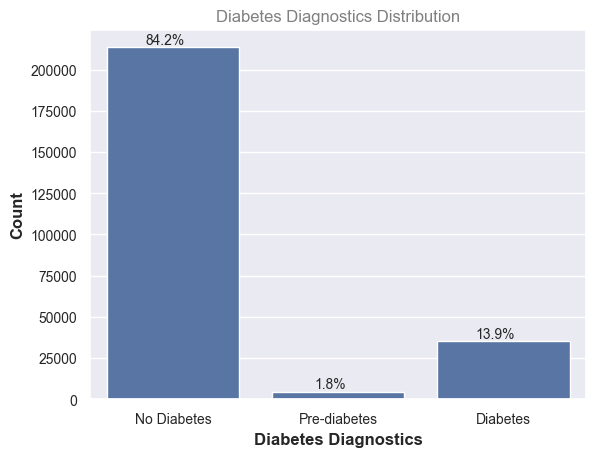

In [18]:
# Copy DataFrame to avoid changing the original dataset
diabts_plot = diabts.copy()

# Replace the numerical values with their meanings
diabts_plot['Diabetes_012'] = diabts_plot['Diabetes_012'].replace({0: 'No Diabetes', 1: 'Pre-diabetes', 2: 'Diabetes'})

# Create Diagnostics distribution plot
ax = sns.countplot(x='Diabetes_012', data=diabts_plot, order=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.title('Diabetes Diagnostics Distribution', color='Grey')
plt.xlabel('Diabetes Diagnostics', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculate the percentage and annotate the plot
total = len(diabts_plot)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=10, ha='center', va='bottom')

plt.show()

#### 4.2. Visualize Numerical Features Distribution

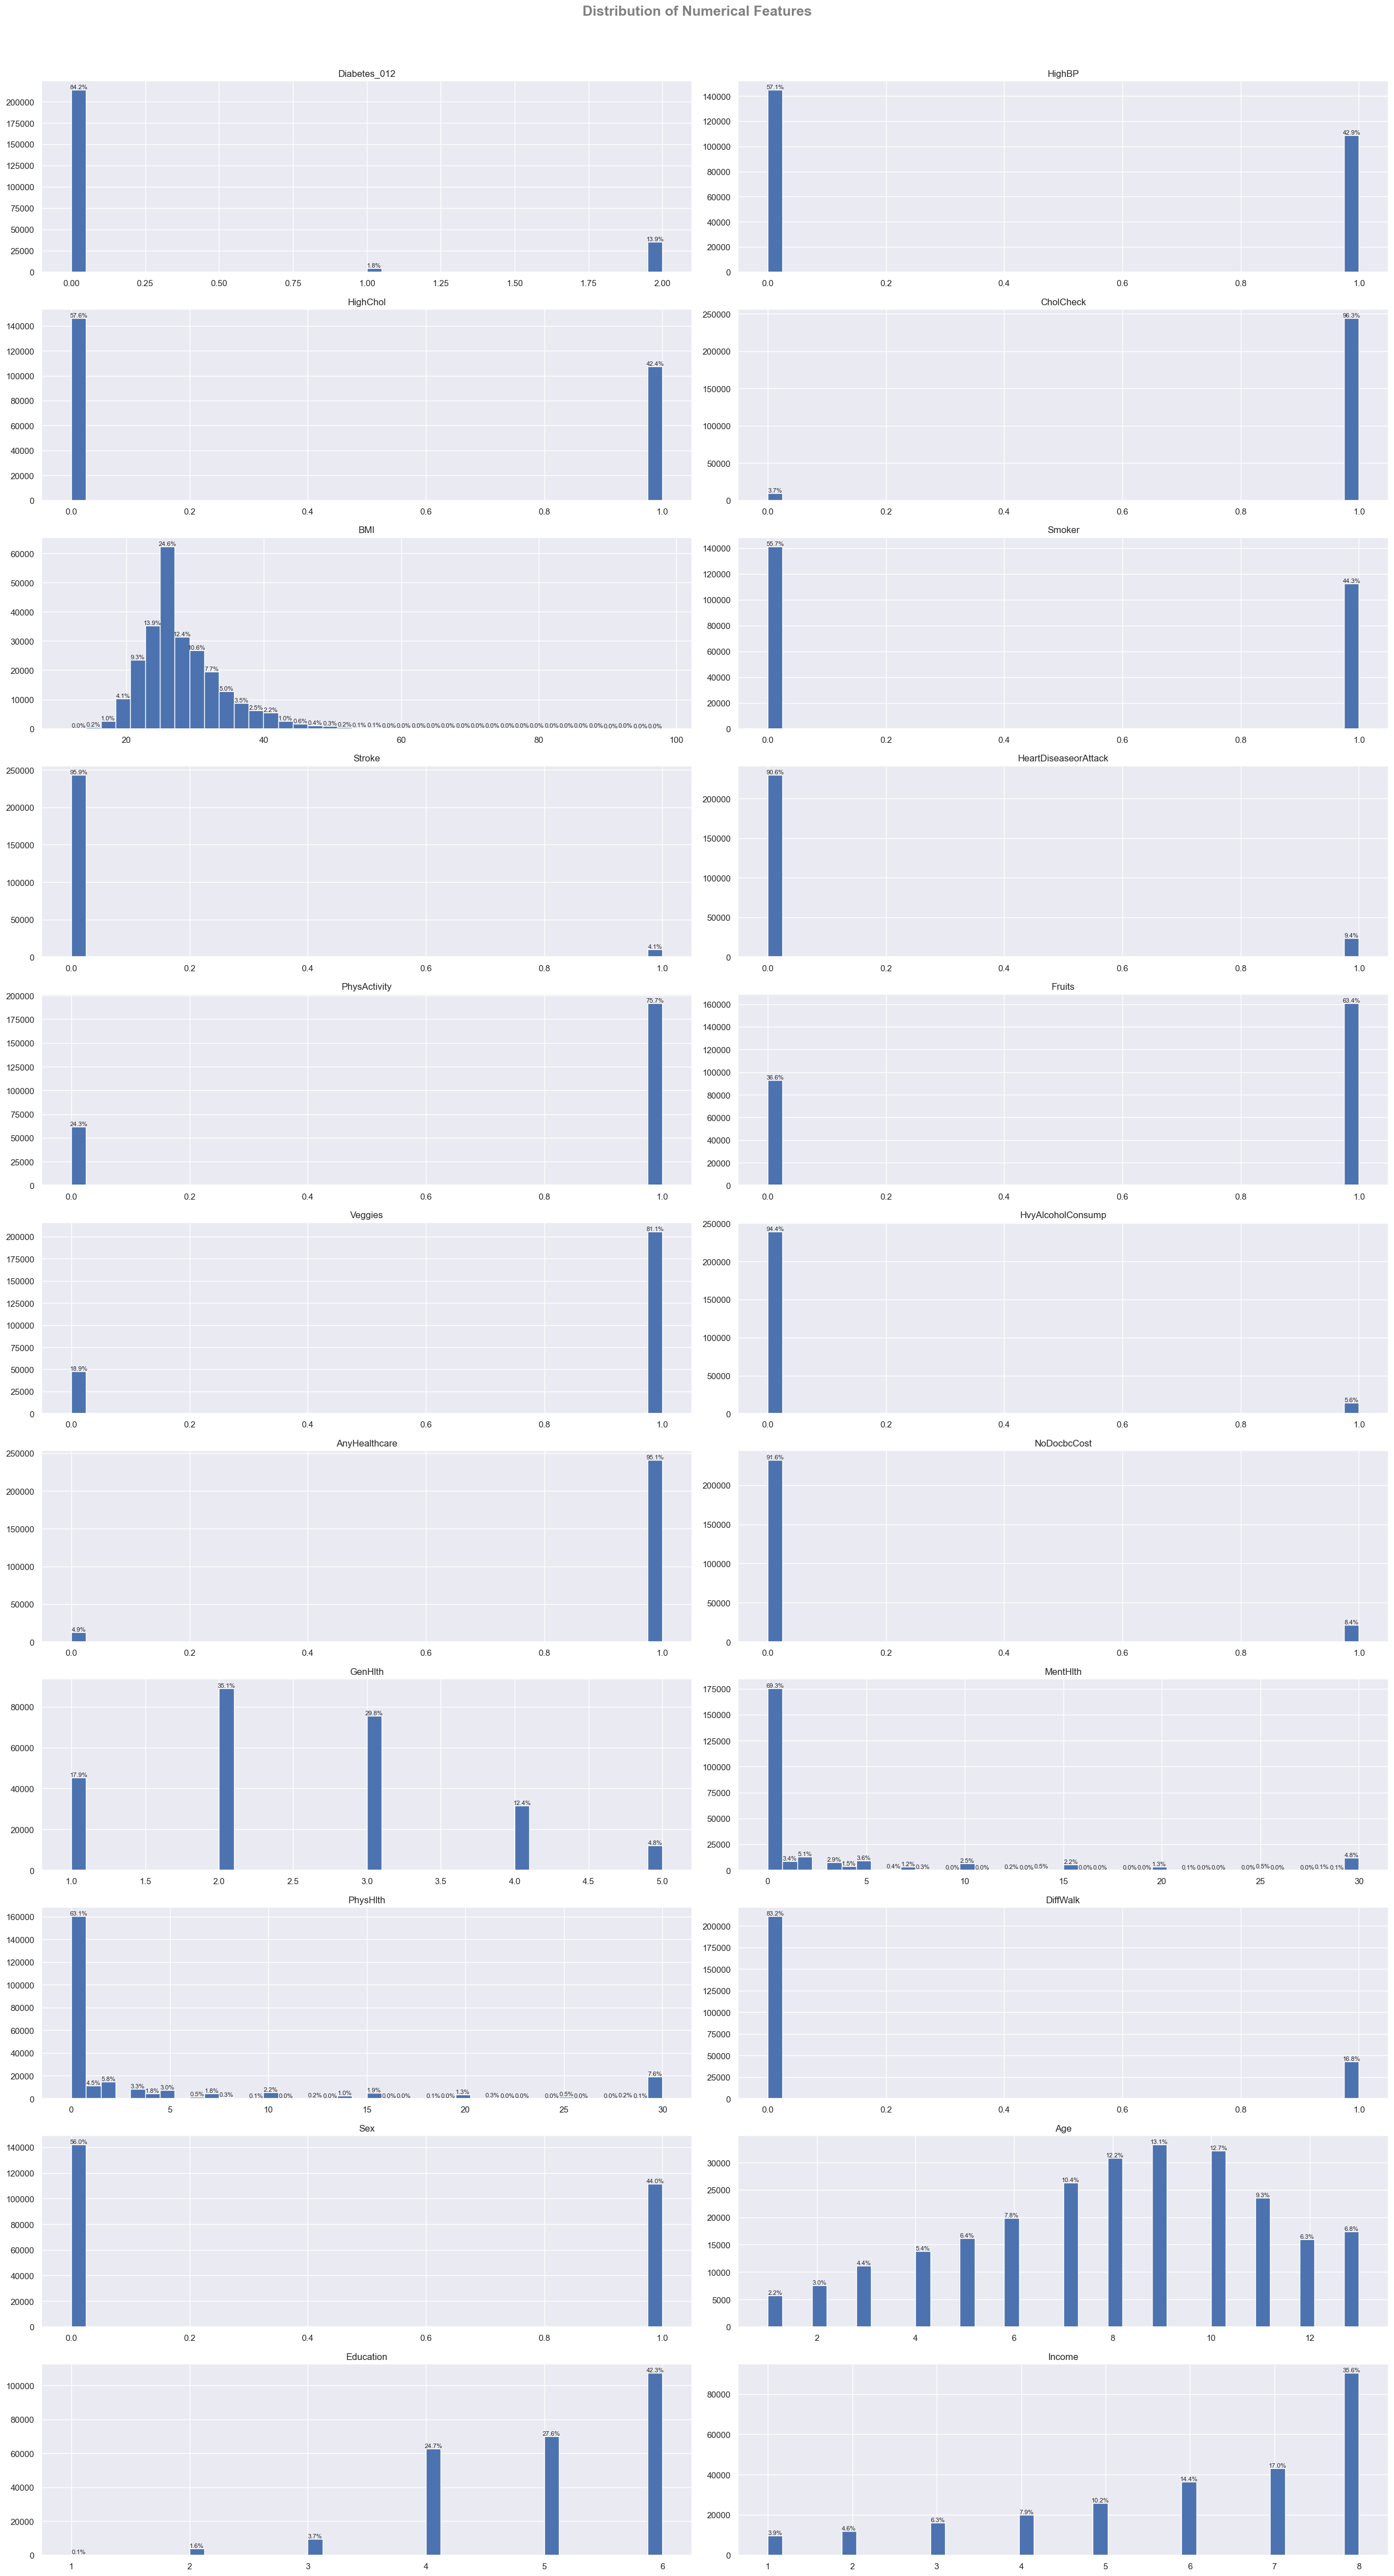

In [53]:
# Understand the spread & central tendencies within the dataset
axes = diabts.hist(figsize=(25, 45), bins=40, layout=(11, 2))

# Calculate the total number of data points
total_points = len(diabts)

# Annotate each subplot with percentages
for ax in axes.flatten():
    if ax.get_title():  # Check if subplot has data
        # Calculate percentages and annotate bars
        for rect in ax.patches:
            height = rect.get_height()
            if height > 0:  # Check if height is greater than 0
                width = rect.get_width()
                center = rect.get_x() + width / 2
                percent = (height / total_points) * 100
                ax.text(center, height, f'{percent:.1f}%', ha='center', va='bottom', fontsize=8)

plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=18, color='Grey', fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.99)
plt.show()

# Note: Saving the plot to a file
# If you uncomment the next line, it will save the plot to a file
# plt.savefig('histogram.png', dpi=300)

#### 4.3. Correlation Matrix

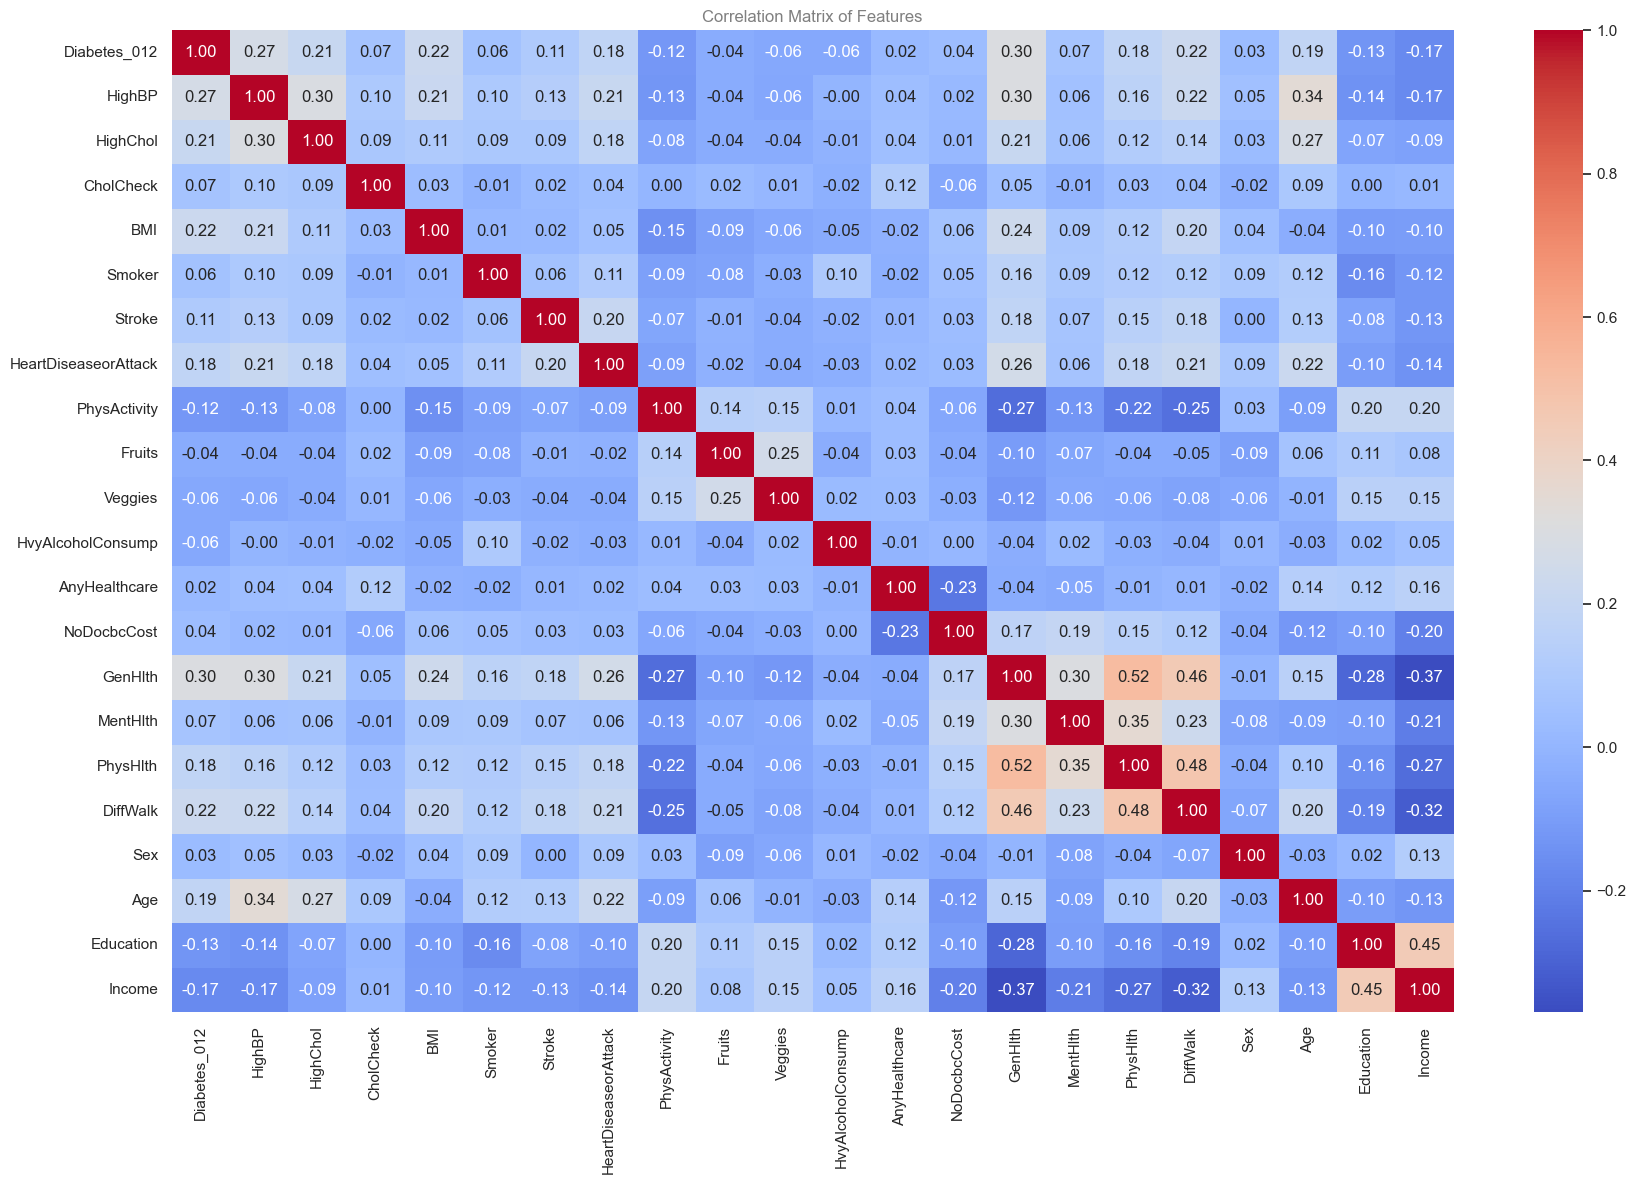

In [54]:
# Visualize relationships between numerical features
corr_matrix = diabts.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features', color='Grey')
plt.tight_layout()
plt.show()

#### 4.4. Correlation Matrix
A pair plot of a few selected features and the target variable can help to visualize potential relationships and separations between classes.

<Figure size 1200x1200 with 0 Axes>

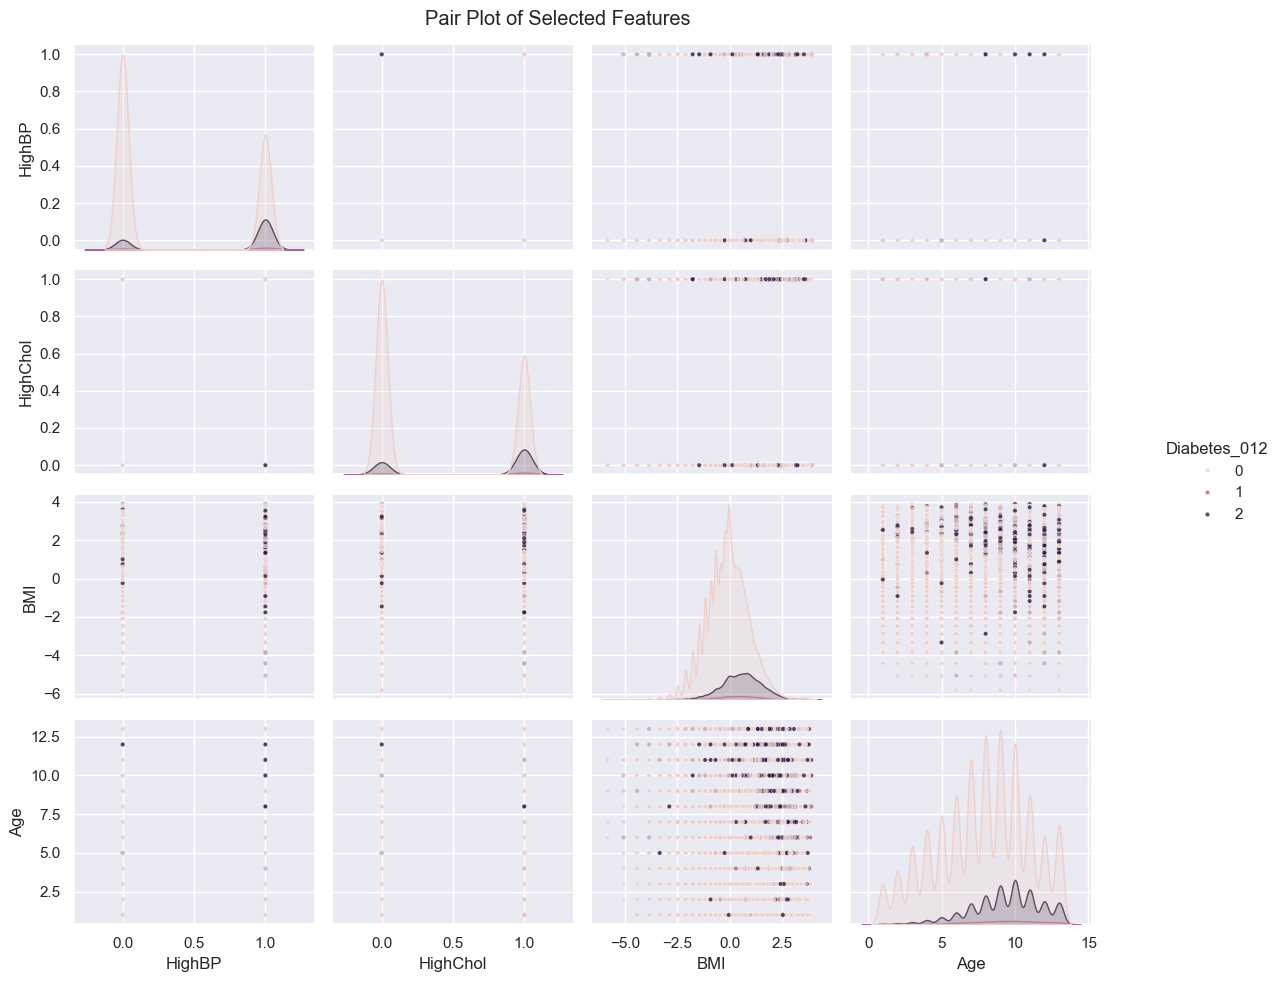

In [55]:
# Take a random sample of 10000 rows from the copied DataFrame
sampled_data = diabts_copy.sample(n=253680, random_state=1)
#sampled_data = diabts_copy.sample(n=100000, random_state=1) #This plots faster

selected_features = ['HighBP', 'HighChol', 'BMI', 'Age', 'Diabetes_012']
plt.figure(figsize=(12, 12))  # Increase figure size
g = sns.pairplot(sampled_data[selected_features], hue='Diabetes_012', plot_kws={'alpha':0.8, 's':10})
plt.suptitle('Pair Plot of Selected Features')
plt.tight_layout()

# Move the legend to an empty part of the plot
g._legend.set_bbox_to_anchor((1.15, 0.5))
plt.show()

# Note:
# This plot can take ~5 minutes

#### 4.5. Visualize features across classes - Box-plots 
Box Plots: Numerical Features vs Target Variable

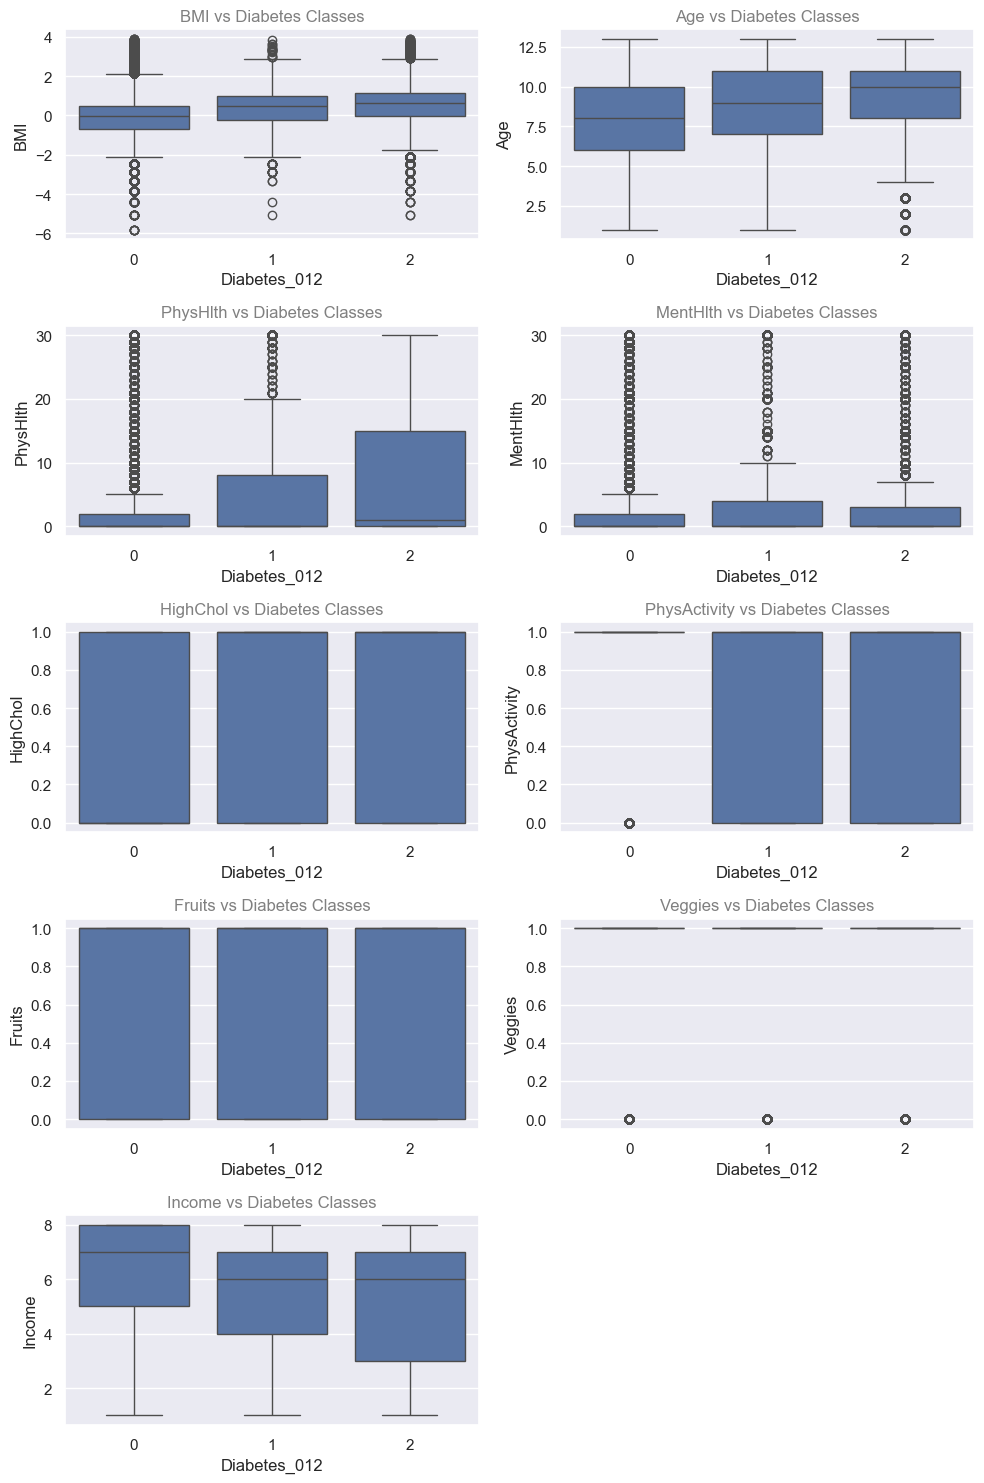

In [104]:
# Features of interest
numerical_features = ['BMI', 'Age', 'PhysHlth', 'MentHlth', 'HighChol', 'PhysActivity', 'Fruits', 'Veggies', 'Income']
n_features = len(numerical_features)

# Calculate the number of rows needed for subplots
n_rows = -(-n_features // 2)  # Ceiling division

# Create subplots: 2 plots per row
fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows * 3))  # Adjusted figsize

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Diabetes_012', y=feature, data=diabts_copy, ax=axes[i])
    axes[i].set_title(f'{feature} vs Diabetes Classes', color="Grey")

# If there is an odd number of features, remove the last (empty) subplot
if n_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

#### 4.6. Categorical Features - Count-plots 
Visualize categorical features distribution  across target variable classes.

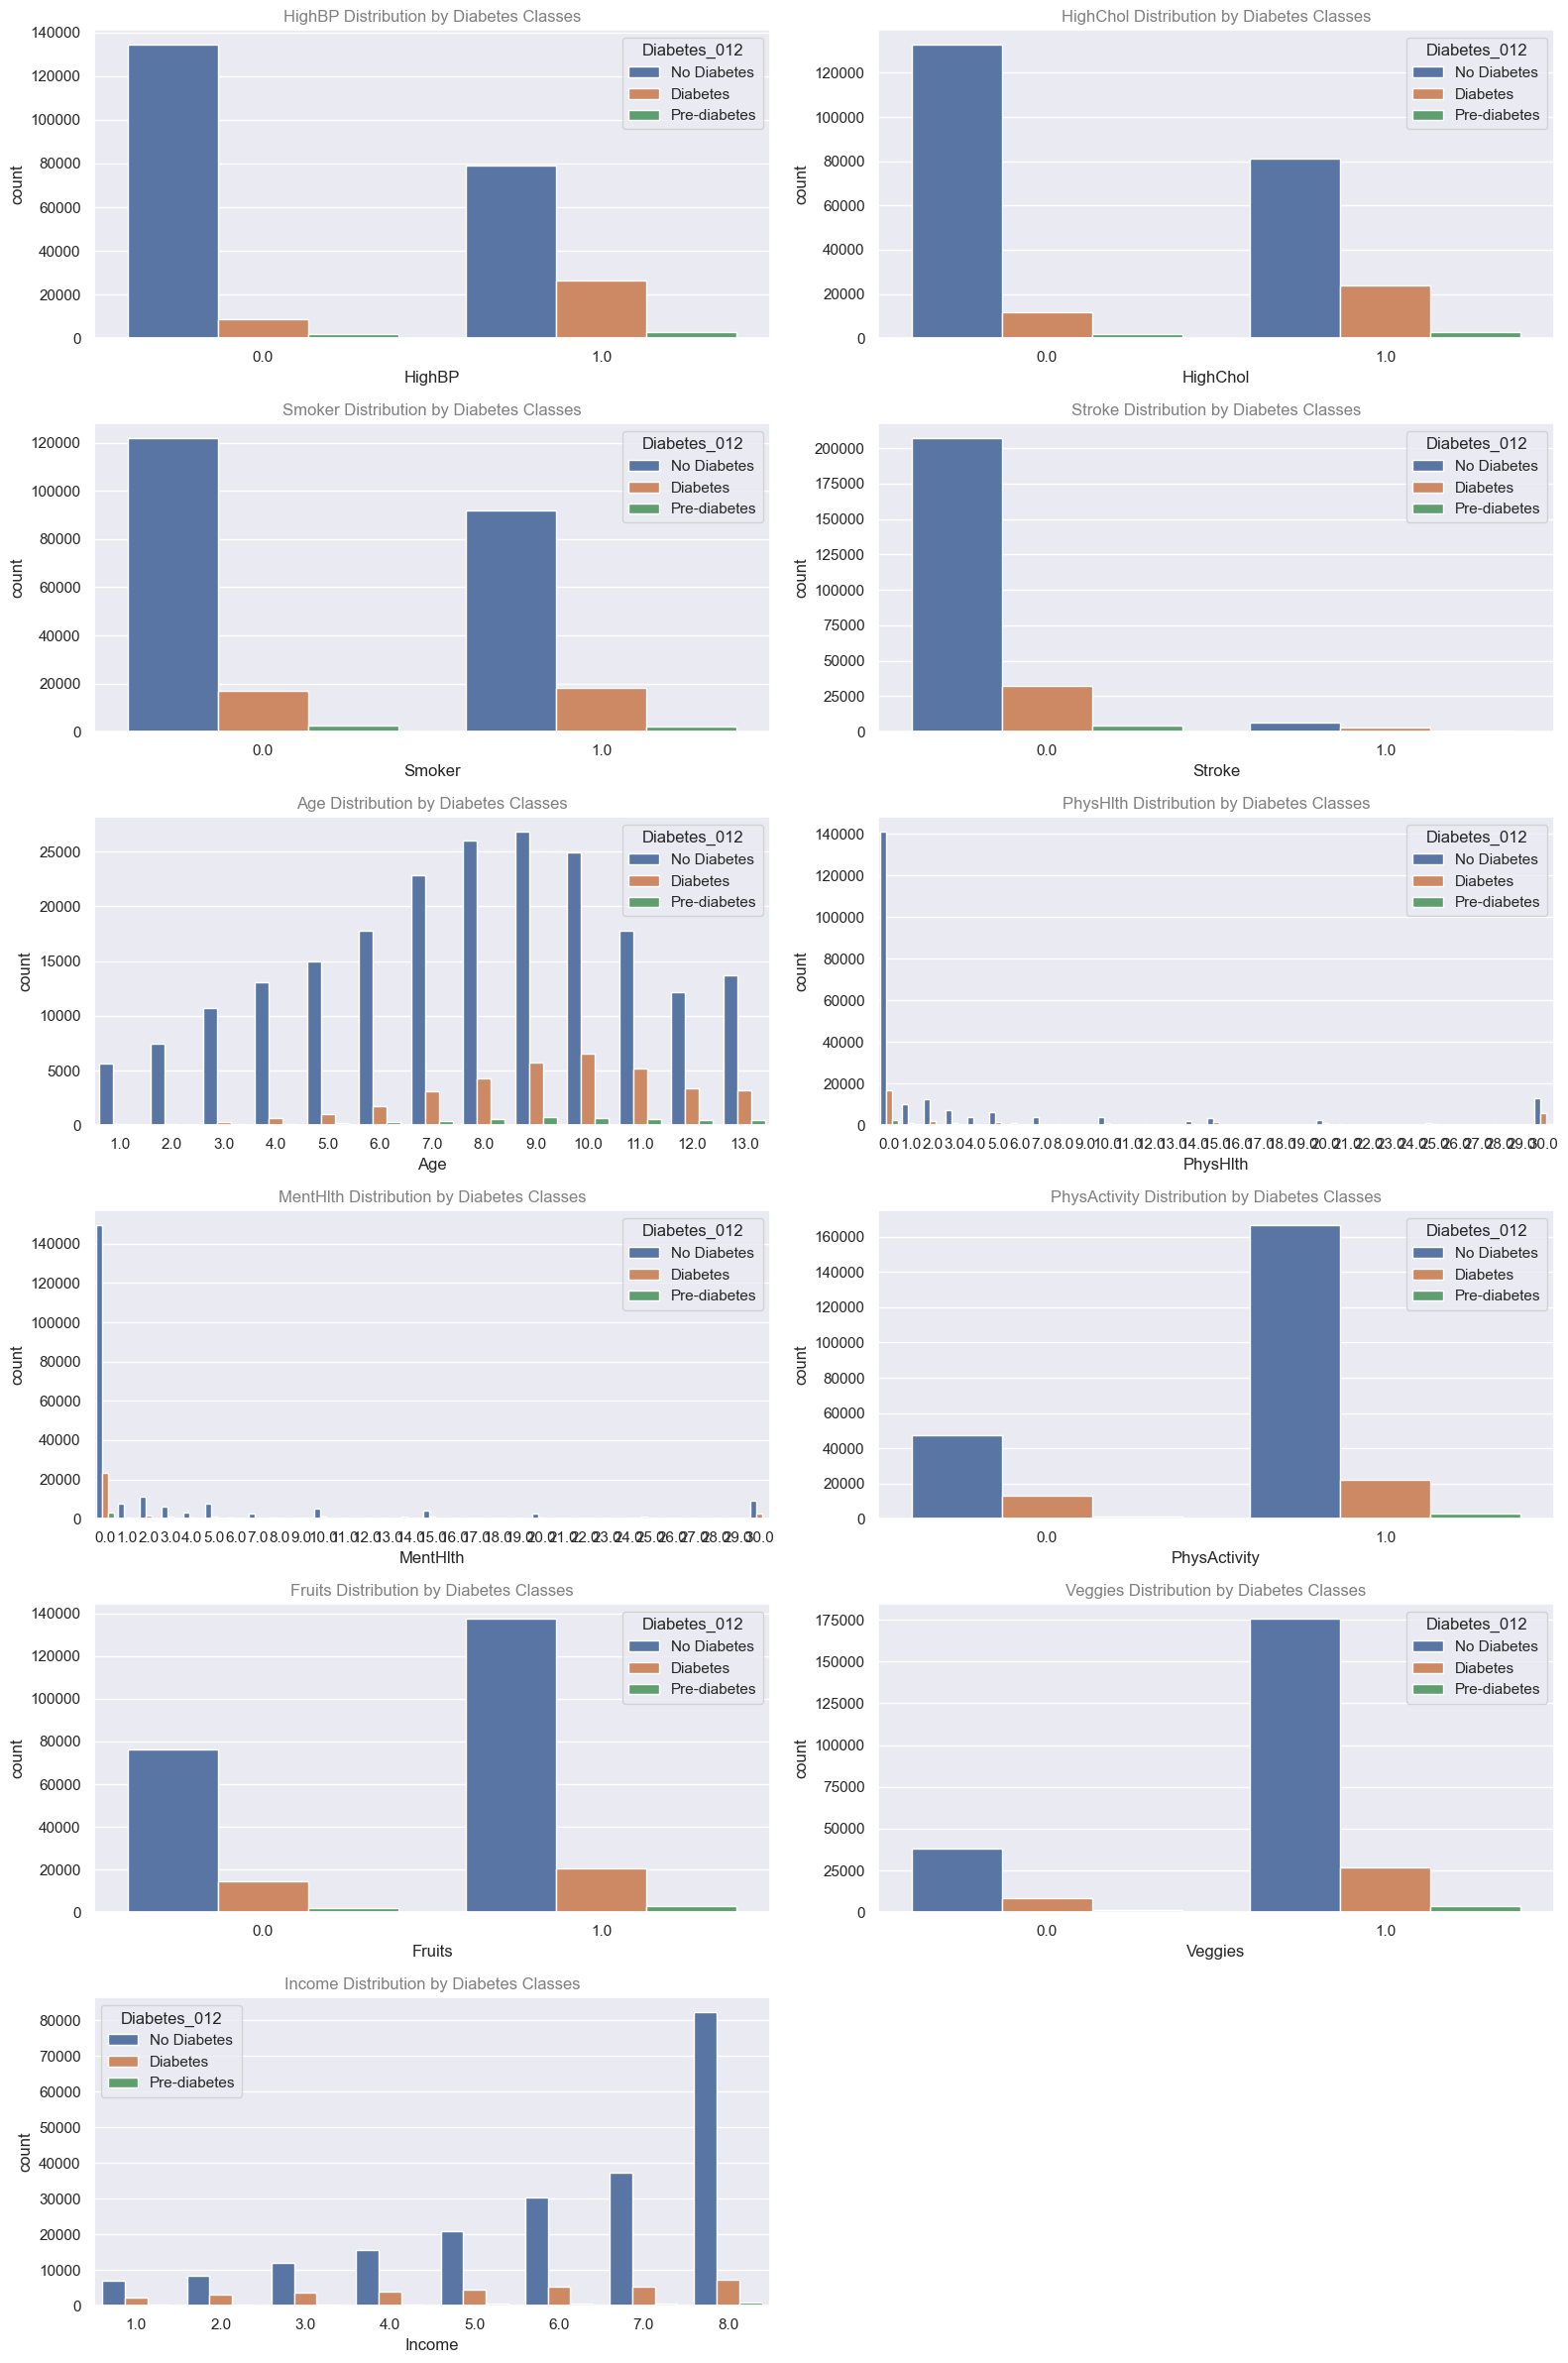

In [101]:
# Create a copy of the diabts DataFrame to ensure that the original data is not modified
countPlot_copy = diabts.copy()

# Replace the numerical values with their meanings for 'Diabetes_012' column
countPlot_copy['Diabetes_012'] = countPlot_copy['Diabetes_012'].replace({0.0: 'No Diabetes', 1.0: 'Pre-diabetes', 2.0: 'Diabetes'})

# Features of interest
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Age', 'PhysHlth', 'MentHlth', 'PhysActivity', 'Fruits', 'Veggies', 'Income']
n_features = len(categorical_features)

# Calculate number of rows needed for subplots
n_rows = -(-n_features // 2)  # Ceiling division

# Create subplots: 2 plots per row
fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    axes[i].set_title(f'{feature} Distribution by Diabetes Classes', color="Grey")
    sns.countplot(x=feature, hue='Diabetes_012', data=countPlot_copy, ax=axes[i])
    
# Autocorrect subplot layout in case we add more features
if n_features % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

### 5. Data Partitioning
Split the data into training, validation, and test sets.

In [19]:
# Separate features and target variable
X = diabts_copy.drop('Diabetes_012', axis=1)
y = diabts_copy['Diabetes_012']

In [20]:
# Dataset split ratio: 70% - training, 15% - validation, & 15% - testing 
from sklearn.model_selection import train_test_split

# First split the data in two sets, 70% for training and 30% for the rest + split seed to reproduce
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 30% of data in two parts, 50% for validation and 50% for test
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_valid.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 177576 samples
Validation set: 38052 samples
Test set: 38052 samples


### 6. Features Selection

In [21]:
# Correlation Analysis with Target Variable
correlation_with_target = diabts_copy.corr()['Diabetes_012'].sort_values(ascending=False)
print(correlation_with_target)

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.230919
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


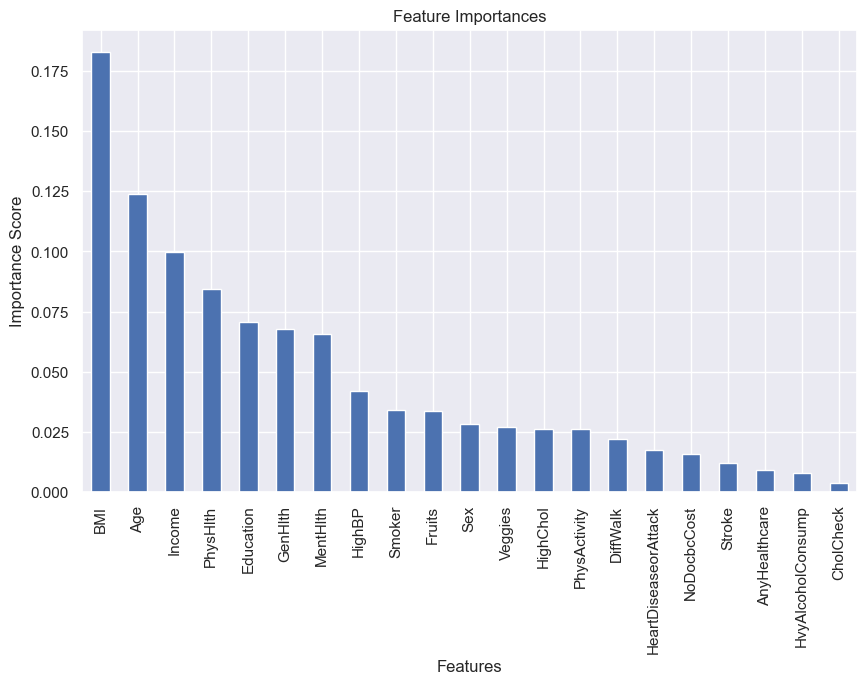

In [22]:
#Determine Feature Importance from Random Forest:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assume X is your feature matrix and y is the target variable
X = diabts.drop('Diabetes_012', axis=1)
y = diabts['Diabetes_012']

# Initialize a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Convert the feature importances to a pandas series for easy plotting
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Note: This takes ~ 25 minutes

### Testing Random Forest with GridSearchCV to determine best hyperparameters for a ML model

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validated Score:", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validated Score: 0.8494875433617155


In [67]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# Sample a smaller subset of the data
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42, stratify=y)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_sample, y_sample)

best_rf = grid_search.best_estimator_

# Note: This takes ~30 minutes

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the validation/test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8448964574792389
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92     32150
           1       0.00      0.00      0.00       708
           2       0.00      0.00      0.00      5194

    accuracy                           0.84     38052
   macro avg       0.28      0.33      0.31     38052
weighted avg       0.71      0.84      0.77     38052

Confusion Matrix:
[[32150     0     0]
 [  708     0     0]
 [ 5194     0     0]]


C:\Users\deeman\anaconda3\envs\gpuweek1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deeman\anaconda3\envs\gpuweek1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deeman\anaconda3\envs\gpuweek1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns
features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
print(features)

                 Feature  Importance
3                    BMI    0.180793
13               GenHlth    0.159899
0                 HighBP    0.133304
18                   Age    0.092342
1               HighChol    0.067885
16              DiffWalk    0.056667
15              PhysHlth    0.053210
20                Income    0.051225
14              MentHlth    0.036728
19             Education    0.030991
6   HeartDiseaseorAttack    0.029494
7           PhysActivity    0.015219
17                   Sex    0.013179
4                 Smoker    0.011935
5                 Stroke    0.011781
8                 Fruits    0.011458
9                Veggies    0.010939
12           NoDocbcCost    0.010039
10     HvyAlcoholConsump    0.009115
11         AnyHealthcare    0.008144
2              CholCheck    0.005653


In [70]:
print("Training Accuracy:", accuracy_score(y_train, best_rf_model.predict(X_train)))
print("Validation Accuracy:", accuracy_score(y_test, y_pred))

Training Accuracy: 0.8420282020092805
Validation Accuracy: 0.8448964574792389


In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the validation/test set
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)  # For AUC-ROC score

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("AUC-ROC (Macro):", roc_auc_score(y_test, y_prob, multi_class='ovo', average='macro'))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8448964574792389
F1 Score (Macro): 0.3053094403768174
AUC-ROC (Macro): 0.6912455177630289
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92     32150
           1       0.00      0.00      0.00       708
           2       0.00      0.00      0.00      5194

    accuracy                           0.84     38052
   macro avg       0.28      0.33      0.31     38052
weighted avg       0.71      0.84      0.77     38052

Confusion Matrix:
[[32150     0     0]
 [  708     0     0]
 [ 5194     0     0]]


C:\Users\deeman\anaconda3\envs\gpuweek1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deeman\anaconda3\envs\gpuweek1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deeman\anaconda3\envs\gpuweek1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Dropping irrelevant columns

In [23]:
# Drop the specified columns from diabts_copy
columns_to_drop = ['NoDocbcCost', 'AnyHealthcare', 'CholCheck']
diabts_copy = diabts_copy.drop(columns=columns_to_drop)

# Now show the first few rows of the modified DataFrame
print(diabts_copy.head().T)

                              0         1          2         3          4
Diabetes_012           0.000000  0.000000   0.000000   0.00000   0.000000
HighBP                 1.000000  0.000000   1.000000   1.00000   1.000000
HighChol               1.000000  0.000000   1.000000   0.00000   1.000000
BMI                    1.638596 -0.445654   0.134514  -0.04574  -0.668354
Smoker                 1.000000  1.000000   0.000000   0.00000   0.000000
Stroke                 0.000000  0.000000   0.000000   0.00000   0.000000
HeartDiseaseorAttack   0.000000  0.000000   0.000000   0.00000   0.000000
PhysActivity           0.000000  1.000000   0.000000   1.00000   1.000000
Fruits                 0.000000  0.000000   1.000000   1.00000   1.000000
Veggies                1.000000  0.000000   0.000000   1.00000   1.000000
HvyAlcoholConsump      0.000000  0.000000   0.000000   0.00000   0.000000
GenHlth                5.000000  3.000000   5.000000   2.00000   2.000000
MentHlth              18.000000  0.000

In [24]:
# scale again
from sklearn.preprocessing import StandardScaler

# List of features to scale
features_to_scale = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data only, and transform both training and testing data
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_valid_scaled[features_to_scale] = scaler.transform(X_valid[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

## 7. Hierarchical classification (2 stages)

### Building the Model structure

In [25]:
# Reset Reports
report_log = {}

In [26]:
# Create New Target Variable for the First-Level Classifier
y_train_first_level = y_train.replace({1: 'Anomaly', 2: 'Anomaly'})
y_valid_first_level = y_valid.replace({1: 'Anomaly', 2: 'Anomaly'})
y_test_first_level = y_test.replace({1: 'Anomaly', 2: 'Anomaly'})

In [27]:
# Mke sure the data is the same type:
y_train_first_level = y_train_first_level.astype(str)
y_valid_first_level = y_valid_first_level.astype(str)
y_test_first_level = y_test_first_level.astype(str)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Function to build and evaluate the performance of a classification model
def build_model(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier on the training data
    model = classifier.fit(X_train, y_train)
    
   # Predict the labels and probabilities of the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Using weighted average for precision, recall, and F1 score to handle multi-class scenarios
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate AUC-ROC. Ensure y_test and y_pred are binary
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Compile the metrics into a dictionary and return
    result_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }
    return result_dict

In [29]:
# Dictionary to store performance metrics
report_log = dict()

In [30]:
# Print the performance metrics of each classifier in a formatted report.
def performance_metrics_report():
    for key in report_log:
        print('-' * 60)
        print('Classification Model -', key)
        print('-' * 60)
        print()
        # Iterate over each metric and print its value
        for score in report_log[key]:
            print(score, ":", report_log[key][score])
        print()

## Stage 1 Classification Models (various tried)

### 7. 1.1. Random Forest Classifier

In [31]:
# Reset Reports
report_log = {}

# Building and evaluating the RandomForestClassifier
report_log['Random Forest - Stage 1'] = build_model(RandomForestClassifier(random_state=42), 
                                          X_train_scaled, y_train_first_level, 
                                          X_test_scaled, y_test_first_level)

# Display the performance metrics report
performance_metrics_report()

------------------------------------------------------------
Classification Model - Random Forest - Stage 1
------------------------------------------------------------

Accuracy : 0.8439766635130873
Precision : 0.8111736041777773
Recall : 0.8439766635130873
F1 Score : 0.817314043994006
AUC-ROC : 0.7930268570160733



#### Filter Data for Second Stage Classification

In [32]:
# Filter records where the Diabetes_012 column is either 1 or 2
second_stage_data = diabts_copy[diabts_copy['Diabetes_012'].isin([1, 2])]

#### Prepare Data for Second Stage

In [33]:
# Assuming X are your feature columns and 'Diabetes_012' is your target column
X_second_stage = second_stage_data.drop(columns=['Diabetes_012'])
y_second_stage = second_stage_data['Diabetes_012']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(
    X_second_stage, y_second_stage, test_size=0.2, random_state=42)

### 7. 1.2. Logistic Regression

In [35]:
# Build the Logistic Regression Model for the first stage
from sklearn.linear_model import LogisticRegression

# Reset Reports
report_log = {}

# Building and evaluating the LogisticRegression
report_log['Logistic Regression - Stage 1'] = build_model(LogisticRegression(max_iter=1000, random_state=42), 
                                                X_train_scaled, y_train_first_level, 
                                                X_test_scaled, y_test_first_level)

# Display the performance metrics report
performance_metrics_report()

------------------------------------------------------------
Classification Model - Logistic Regression - Stage 1
------------------------------------------------------------

Accuracy : 0.8506254598969831
Precision : 0.8189680928206614
Recall : 0.8506254598969831
F1 Score : 0.8191302492785651
AUC-ROC : 0.8206243606695782



### 7. 1.3. Support Vector Machines (SVM)

In [41]:
# Build the SVM Model for the first stage
from sklearn.svm import SVC

report_log = {}  # Reset Reports

report_log['SVM - Stage 1'] = build_model(
                                SVC(kernel='linear', probability=True, random_state=42),
                                X_train_scaled, y_train_first_level, 
                                X_test_scaled, y_test_first_level)

# Display the performance metrics report for the first stage
performance_metrics_report()

C:\Users\deeman\anaconda3\envs\gpuweek1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------------------------------------
Classification Model - SVM - Stage 1
------------------------------------------------------------

Accuracy : 0.8448964574792389
Precision : 0.7138500238609674
Recall : 0.8448964574792389
F1 Score : 0.7738645938280257
AUC-ROC : 0.7249916811287315



### 7. 1.4. K-Nearest Neighbors

In [42]:
# Build the K-Nearest Neighbors Model for the first stage
from sklearn.neighbors import KNeighborsClassifier

report_log = {}  # Reset Reports

report_log['K-Nearest Neighbors - Stage 1'] = build_model(
                                                KNeighborsClassifier(n_neighbors=5),
                                                X_train_scaled, y_train_first_level, 
                                                X_test_scaled, y_test_first_level)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - K-Nearest Neighbors - Stage 1
------------------------------------------------------------

Accuracy : 0.8319667822979081
Precision : 0.802748705829615
Recall : 0.8319667822979081
F1 Score : 0.8124947127406672
AUC-ROC : 0.7257963665742113



### 7. 1.5. Stochastic Gradient Descent (SGD)

In [40]:
# Build the SGD Model for the first stage
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier

# Create a SGD classifier with hinge loss
sgd = SGDClassifier(loss='hinge', random_state=42)

# Calibrate it using isotonic regression
calibrated_sgd = CalibratedClassifierCV(sgd, method='isotonic')

# Build the model
report_log['SGD - Stage 1'] = build_model(
                                calibrated_sgd,
                                X_train_scaled, y_train_first_level, 
                                X_test_scaled, y_test_first_level)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - SGD - Stage 1
------------------------------------------------------------

Accuracy : 0.8467886050667508
Precision : 0.8159917029023187
Recall : 0.8467886050667508
F1 Score : 0.7827357692197786
AUC-ROC : 0.8134858890125023



### 7. 1.6. Naive Bayes

In [36]:
# Build the Naive Bayes Model for the first stage
from sklearn.naive_bayes import GaussianNB

report_log = {}  # Reset Reports

report_log['Naive Bayes - Stage 1'] = build_model(
                                GaussianNB(),
                                X_train_scaled, y_train_first_level, 
                                X_test_scaled, y_test_first_level)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - Naive Bayes - Stage 1
------------------------------------------------------------

Accuracy : 0.7659781351834332
Precision : 0.8208914802956364
Recall : 0.7659781351834332
F1 Score : 0.7867546412880394
AUC-ROC : 0.7779273757531648



### 7. 1.7.  Decision Trees

In [43]:
# Build the Decision Trees Model for the first stage
from sklearn.tree import DecisionTreeClassifier

report_log = {}  # Reset Reports

report_log['Decision Trees - Stage 1'] = build_model(
                                DecisionTreeClassifier(random_state=42),
                                X_train_scaled, y_train_first_level, 
                                X_test_scaled, y_test_first_level)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - Decision Trees - Stage 1
------------------------------------------------------------

Accuracy : 0.7790392095027857
Precision : 0.787599512724802
Recall : 0.7790392095027857
F1 Score : 0.7831538132853051
AUC-ROC : 0.5970984873198478



### 7. 1.8.  Gradient Boosted Trees

In [91]:
# Build the Gradient Boosted Trees Model for the first stage
from sklearn.ensemble import GradientBoostingClassifier

report_log = {}  # Reset Reports

report_log['Gradient Boosted Trees - Stage 1'] = build_model(
                                GradientBoostingClassifier(random_state=42),
                                X_train_scaled, y_train_first_level, 
                                X_test_scaled, y_test_first_level)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - Gradient Boosted Trees - Stage 1
------------------------------------------------------------

Accuracy : 0.8537001997266898
Precision : 0.8250906937233801
Recall : 0.8537001997266898
F1 Score : 0.8244401736071938
AUC-ROC : 0.8255720627164369



In [94]:
!pip install shap lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 960.0 kB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ------------------ --------------------- 1.0/2.1 MB 31.4 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 26.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
     -------------------------- ------------- 2.7/4.2 MB 88.2 MB/s eta 0:00:01
     ---------------------------------------- 4.2/4.2 MB 53.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.7 MB ? eta -:--:--
   ----- ---------------------------------- 3.1/22.7 MB 6

  You can safely remove it manually.


### Evaluate the Best model from Stage 1 (Gradient Boost Trees)

In [99]:
import shap

# Build and train your model
gbt_model = GradientBoostingClassifier(random_state=42)
gbt_model.fit(X_train_scaled, y_train_first_level)

# Create a SHAP explainer
explainer = shap.TreeExplainer(gbt_model)

# Calculate SHAP values for a sample of the test set
shap_values = explainer.shap_values(X_test_scaled[:100])  # Using a sample for efficiency

# Plot the SHAP values for the first prediction
# Plot the SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_scaled.iloc[0])

### 7. 1.9.  Neural Network

In [45]:
# Build the Neural Network Model for the first stage
from sklearn.neural_network import MLPClassifier

report_log = {}  # Reset Reports

report_log['Neural Network - Stage 1'] = build_model(
                                MLPClassifier(random_state=42),
                                X_train_scaled, y_train_first_level, 
                                X_test_scaled, y_test_first_level)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - Neural Network - Stage 1
------------------------------------------------------------

Accuracy : 0.8512298959318827
Precision : 0.8202305272813886
Recall : 0.8512298959318827
F1 Score : 0.8202550887577607
AUC-ROC : 0.8241680417266362



### 7. 1.10.  XGBoost

In [70]:
# Install other librarie
!pip install xgboost lightgbm catboost transformers

     ---------------------------------------- 0.0/121.5 kB ? eta -:--:--
     --------- ----------------------------- 30.7/121.5 kB 1.3 MB/s eta 0:00:01
     ----------------------------- --------- 92.2/121.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 121.5/121.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.7 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/7.7 MB 14.3 MB/s eta 0:00:01
   ----------------- ---------------------- 3.3/7.7 MB 23.6 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.7 MB 26.8 MB/s eta 0:00:01
   ----

In [50]:
# Build the XGBoost Model for the first stage
# Map string labels to numeric labels
label_mapping = {'0': 0, 'Anomaly': 1}

y_train_first_level_numeric = y_train_first_level.map(label_mapping)
y_test_first_level_numeric = y_test_first_level.map(label_mapping)

# Reset Reports
report_log = {}

# Build the XGBoost Model for the first stage
report_log['XGBoost - Stage 1'] = build_model(
                                xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                                X_train_scaled, y_train_first_level_numeric, 
                                X_test_scaled, y_test_first_level_numeric)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - XGBoost - Stage 1
------------------------------------------------------------

Accuracy : 0.851256175759487
Precision : 0.8209218049022002
Recall : 0.851256175759487
F1 Score : 0.821959808120259
AUC-ROC : 0.8215648700680319



# 7. 1.11.  LightGBM

In [52]:
# Build the LightGBM Model for the first stage
import lightgbm as lgb

# Reset Reports
report_log = {}

# Build the LightGBM Model for the first stage
report_log['LightGBM - Stage 1'] = build_model(
                                lgb.LGBMClassifier(random_state=42),
                                X_train_scaled, y_train_first_level_numeric, 
                                X_test_scaled, y_test_first_level_numeric)

# Display the performance metrics report for the first stage
performance_metrics_report()

[LightGBM] [Info] Number of positive: 28053, number of negative: 149523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 177576, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157977 -> initscore=-1.673355
[LightGBM] [Info] Start training from score -1.673355
------------------------------------------------------------
Classification Model - LightGBM - Stage 1
------------------------------------------------------------

Accuracy : 0.8523599285188689
Precision : 0.8221612477937855
Recall : 0.8523599285188689
F1 Score : 0.8211039222230526
AUC-ROC : 0.8251959822776684



# 7. 1.12.  CatBoost

In [53]:
# Build the LightGBM Model for the first stage
import catboost as cb

# Reset Reports
report_log = {}

# Build the CatBoost Model for the first stage
report_log['CatBoost - Stage 1'] = build_model(
                                cb.CatBoostClassifier(random_state=42, verbose=0),  # verbose=0 for silent training
                                X_train_scaled, y_train_first_level_numeric, 
                                X_test_scaled, y_test_first_level_numeric)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - CatBoost - Stage 1
------------------------------------------------------------

Accuracy : 0.8510984967938611
Precision : 0.8201894780451551
Recall : 0.8510984967938611
F1 Score : 0.8206364229477519
AUC-ROC : 0.8239115875526286



# 7. 1.13.  Anomaly Detection Models: Isolation Forest

In [64]:
def build_isolation_forest_model(classifier, X_train, y_train, X_test, y_test):
    """
    A custom function to build the Isolation Forest model and compute its performance metrics.
    """
    # Convert 'Anomaly' to -1 and '0' to 1 for IsolationForest's prediction
    y_train_iso = y_train.replace({'Anomaly': -1, '0': 1}).astype(int)
    y_test_iso = y_test.replace({'Anomaly': -1, '0': 1}).astype(int)

    # Fit the model
    model = classifier.fit(X_train)

    # Predicting with the model
    y_pred_test = model.predict(X_test)

    # Compute performance metrics
    accuracy = accuracy_score(y_test_iso, y_pred_test)
    
    # Using weighted average for precision, recall, and F1 score to handle multi-class scenarios
    precision = precision_score(y_test_iso, y_pred_test, average='weighted', labels=[-1, 1])
    recall = recall_score(y_test_iso, y_pred_test, average='weighted', labels=[-1, 1])
    f1 = f1_score(y_test_iso, y_pred_test, average='weighted', labels=[-1, 1])

    # Compile the metrics into a dictionary and return
    result_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        # AUC-ROC cannot be computed for IsolationForest as it does not provide probabilities
    }
    return result_dict

report_log = {}  # Reset Reports

# Build the Isolation Forest Model for the first stage
report_log['Isolation Forest - Stage 1'] = build_isolation_forest_model(
                                IsolationForest(contamination=0.05, random_state=42),
                                X_train_scaled, y_train_first_level, 
                                X_test_scaled, y_test_first_level)

# Display the performance metrics report for the first stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - Isolation Forest - Stage 1
------------------------------------------------------------

Accuracy : 0.8267896562598549
Precision : 0.7693940250201319
Recall : 0.8267896562598549
F1 Score : 0.7866706926813509



# 7. 1.14.  Transformers 

In [78]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import pandas as pd

# Preparation for BERT input
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Ensure that labels are integer-encoded and not in string format
y_train_first_level = y_train_first_level.astype('category').cat.codes

train_examples = [InputExample(guid=str(i), text_a=str(X_train_scaled.iloc[i]), label=y_train_first_level.iloc[i]) for i in range(len(y_train_first_level))]

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [InputFeatures(input_ids=tokenizer.encode(example.text_a, add_special_tokens=True, max_length=max_length, padding='max_length', truncation=True),
                              attention_mask=[1] * len(tokenizer.encode(example.text_a, add_special_tokens=True, max_length=max_length, padding='max_length', truncation=True)),
                              label=example.label) for example in examples]
    
    def gen():
        for f in features:
            yield ({"input_ids": f.input_ids, "attention_mask": f.attention_mask}, f.label)
    
    return tf.data.Dataset.from_generator(gen, ({"input_ids": tf.int32, "attention_mask": tf.int32}, tf.int64), ({"input_ids": tf.TensorShape([None]), "attention_mask": tf.TensorShape([None])}, tf.TensorShape([])))

train_dataset = convert_examples_to_tf_dataset(train_examples, tokenizer).shuffle(100).batch(32).repeat(2)

# Model configuration and training
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
model.fit(train_dataset, epochs=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
11100/11100 [==============================] - 7034s 633ms/step - loss: 0.3602 - accuracy: 0.8462
Epoch 2/2
11100/11100 [==============================] - 7055s 636ms/step - loss: 0.3563 - accuracy: 0.8477


## Stage 2

### Determine the important features between Pre-Diabetes and Diabetes

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filter the data for only Pre-diabetes and Diabetes
stage2_data = diabts_copy[diabts_copy['Diabetes_012'] != 0]

# Define features and target variable
X_stage2 = stage2_data.drop(columns=['Diabetes_012'])
y_stage2 = stage2_data['Diabetes_012']

# Splitting the data into training and testing sets
X_train_stage2, X_test_stage2, y_train_stage2, y_test_stage2 = train_test_split(X_stage2, y_stage2, test_size=0.2, random_state=42)

# Scaling the data (if you've done this before for the first stage)
scaler = StandardScaler()
X_train_stage2_scaled = scaler.fit_transform(X_train_stage2)
X_test_stage2_scaled = scaler.transform(X_test_stage2)

# Train the Random Forest Classifier
stage2_rf_model = RandomForestClassifier(random_state=42)
stage2_rf_model.fit(X_train_stage2_scaled, y_train_stage2)

# Evaluate Feature Importances
feature_importances_stage2 = stage2_rf_model.feature_importances_
features_stage2 = pd.DataFrame({'Feature': X_stage2.columns, 'Importance': feature_importances_stage2})
features_stage2 = features_stage2.sort_values(by='Importance', ascending=False)

print(features_stage2)

                 Feature  Importance
2                    BMI    0.192321
15                   Age    0.136591
17                Income    0.118294
12              PhysHlth    0.088121
16             Education    0.079139
11              MentHlth    0.072269
10               GenHlth    0.050054
3                 Smoker    0.037304
7                 Fruits    0.034818
1               HighChol    0.034726
6           PhysActivity    0.031435
8                Veggies    0.029775
14                   Sex    0.028090
13              DiffWalk    0.019222
0                 HighBP    0.014800
5   HeartDiseaseorAttack    0.012837
4                 Stroke    0.011191
9      HvyAlcoholConsump    0.009012


### Building Models for Stage 2

### 7. 2.1. Random Forest Classifier

In [163]:
# Reset Reports
report_log = {}

# Build the Random Forest Classifier Model for the second stage
report_log['Random Forest - Stage 2'] = build_model(
    RandomForestClassifier(random_state=42),
    X_train_second, y_train_second, 
    X_test_second, y_test_second
)
# Display the performance metrics report for both the first and second stages
performance_metrics_report()

------------------------------------------------------------
Classification Model - Random Forest - Stage 2
------------------------------------------------------------

Accuracy : 0.8800650325162581
Precision : 0.8054728346417257
Recall : 0.8800650325162581
F1 Score : 0.8303012916687511
AUC-ROC : 0.5741964037502176



### 7. 2.2. Logistic Regression

In [164]:
# Reset Reports
report_log = {}

from sklearn.linear_model import LogisticRegression

# Build the Logistic Regression Model for the second stage
report_log['Logistic Regression - Stage 2'] = build_model(
    LogisticRegression(max_iter=1000, random_state=42),
    X_train_second, y_train_second, 
    X_test_second, y_test_second
)

# Display the performance metrics report for the second stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - Logistic Regression - Stage 2
------------------------------------------------------------

Accuracy : 0.884192096048024
Precision : 0.7817956627137981
Recall : 0.884192096048024
F1 Score : 0.8298470886843927
AUC-ROC : 0.6131317952838172



C:\Users\deeman\anaconda3\envs\gpuweek1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 7. 2.3. Gradient Boost Trees

In [80]:
# Reset Reports
report_log = {}

# Build the Gradient Boosted Trees Model for the second stage
report_log['Gradient Boosted Trees - Stage 2'] = build_model(
    GradientBoostingClassifier(random_state=42),
    X_train_second, y_train_second, 
    X_test_second, y_test_second
)

# Display the performance metrics report for the second stage
performance_metrics_report()

------------------------------------------------------------
Classification Model - Gradient Boosted Trees - Stage 2
------------------------------------------------------------

Accuracy : 0.884192096048024
Precision : 0.8397846033349424
Recall : 0.884192096048024
F1 Score : 0.8300894594682292
AUC-ROC : 0.6269009992637646



### Evaluate the Best model from Stage 2 (Gradient Boost Trees)

In [100]:
import shap

# Build and train your model for the second stage
gbt_model_stage_2 = GradientBoostingClassifier(random_state=42)
gbt_model_stage_2.fit(X_train_second, y_train_second)

# Create a SHAP explainer for the second stage model
explainer_stage_2 = shap.TreeExplainer(gbt_model_stage_2)

# Calculate SHAP values for a sample of the test set of the second stage
shap_values_stage_2 = explainer_stage_2.shap_values(X_test_second[:100])  # Using a sample for efficiency

# Plot the SHAP values for the first prediction of the second stage model
shap.initjs()
shap.force_plot(explainer_stage_2.expected_value, shap_values_stage_2[0], X_test_second.iloc[0])